In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import pandas as pd

In [2]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [3]:
df_edge = pd.read_csv('twitch\FR\musae_FR_edges.csv')
df_target = pd.read_csv('twitch\FR\musae_FR_target.csv')

In [4]:
df_target = df_target[df_target.partner.eq(True)]
df_target = df_target[df_target.mature.eq(True)]

In [5]:
#Caricamento del grafo orientato
nodes = df_target['new_id'].to_list()
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

In [6]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
graph.add_nodes_from(nodes)
pos = nx.spring_layout(graph)

### Analisi descrittiva

In [7]:
print("NODES: ", len(graph.nodes))
print("EDGES: ", len(graph.edges))
print("DENSITY: ", round(nx.density(graph),3))
print("CLUSTERING: ", nx.average_clustering(graph))
#print("RAGGIO: ", nx.radius(graph))
#print("DIAMETRO: ", nx.diameter(graph))
#print("IS_CONNECTED: ", nx.is_connected(graph))

NODES:  159
EDGES:  1259
DENSITY:  0.05
CLUSTERING:  0.18541144442996577


In [8]:
nx.clustering(graph)

{38: 0.11884057971014493,
 4440: 0.1736842105263158,
 4069: 0.11067193675889328,
 1240: 0.12867647058823528,
 6101: 0.17641129032258066,
 5310: 0.0969732588892154,
 4114: 0.18286099865047234,
 5613: 0.16666666666666666,
 1824: 0.16097560975609757,
 871: 0.18421052631578946,
 1687: 0.1477832512315271,
 1314: 0.17846153846153845,
 1343: 0.19005847953216373,
 2161: 0.0891891891891892,
 1356: 0.2803030303030303,
 4565: 0.14957264957264957,
 4211: 0.12867647058823528,
 2507: 0.25,
 5821: 0.3560606060606061,
 535: 0.2545454545454545,
 3010: 0.11375661375661375,
 1756: 0.19047619047619047,
 2614: 0.17588932806324112,
 1020: 0.09783368273934312,
 586: 0.26515151515151514,
 2253: 0.22727272727272727,
 1183: 0.20899470899470898,
 1015: 0.1875,
 2682: 0.2619047619047619,
 3905: 0.25274725274725274,
 6354: 0.28846153846153844,
 4662: 0.10909090909090909,
 3917: 0.13344155844155844,
 5108: 0.15669515669515668,
 1055: 0.39285714285714285,
 6488: 0.17391304347826086,
 4320: 0.12380952380952381,
 1474

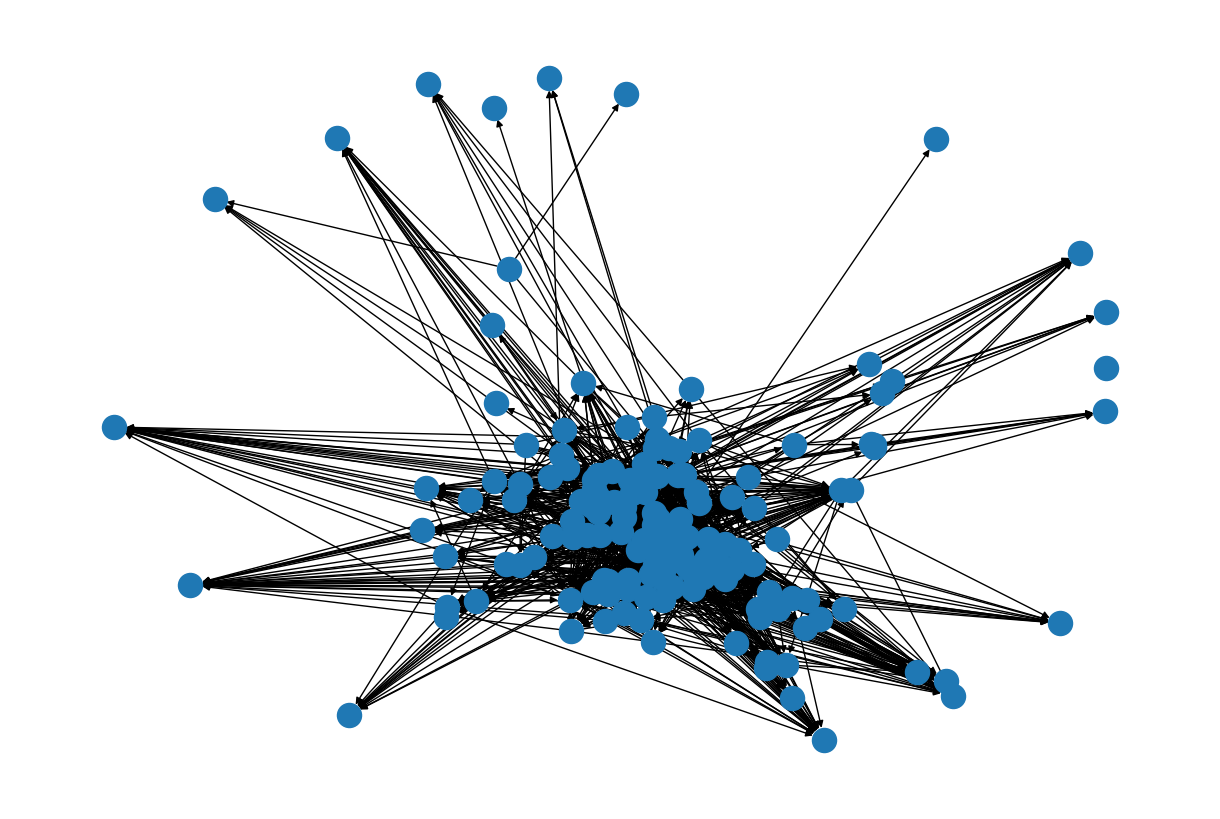

In [9]:
plt.figure(figsize=(12,8))
nx.draw(graph, pos)
plt.show()

### Analisi della centralità

Degree Centrality

<Figure size 1500x1000 with 0 Axes>

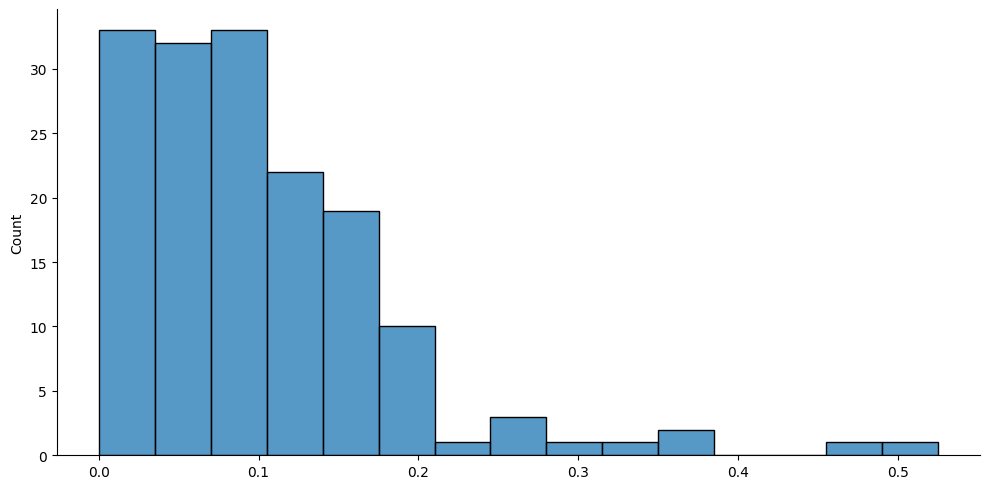

In [7]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(degree.values()), kde=False, aspect = 2)

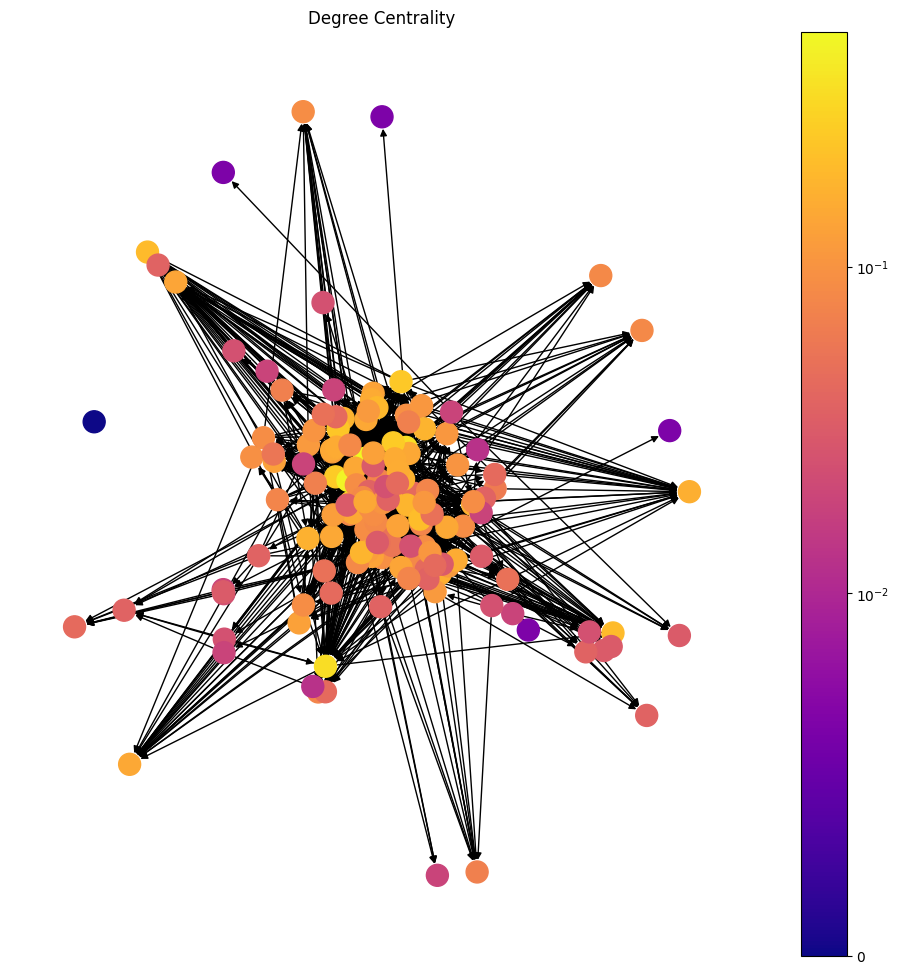

In [11]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, degree, 'Degree Centrality')

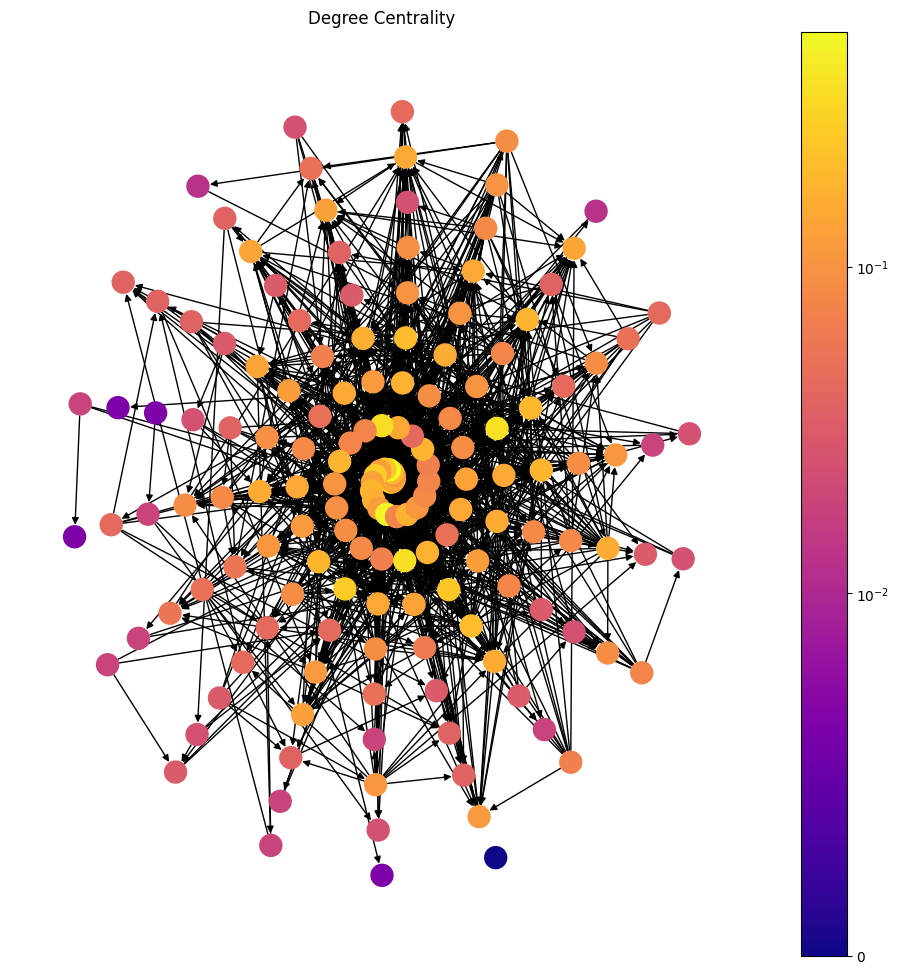

In [12]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Degree Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

<AxesSubplot:>

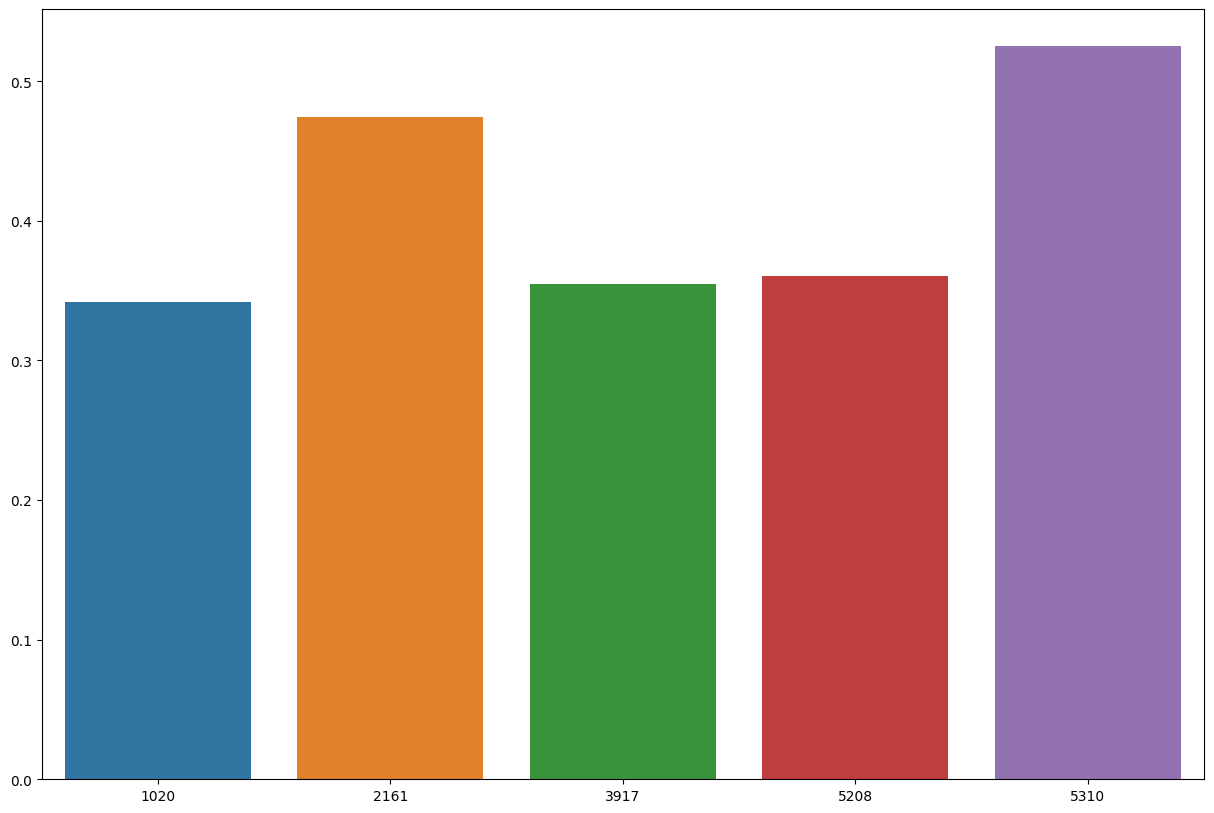

In [37]:
degree = nx.degree_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in degree.items():
    if value > 0.3: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

{5310: Text(-0.11197641038083986, 0.009832740669758876, '5310'),
 2161: Text(-0.09327010723465802, -0.001784501223035967, '2161'),
 1020: Text(0.10893077503718752, -0.023074288893540653, '1020'),
 3917: Text(-0.07266138093797644, -0.03401898586482704, '3917'),
 5208: Text(-0.14939145689034905, 0.09556874813826047, '5208')}

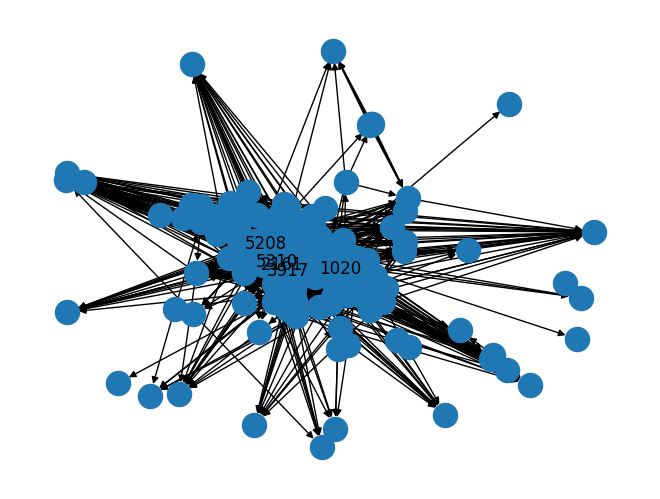

In [8]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in degree.items():
    if value > 0.3: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

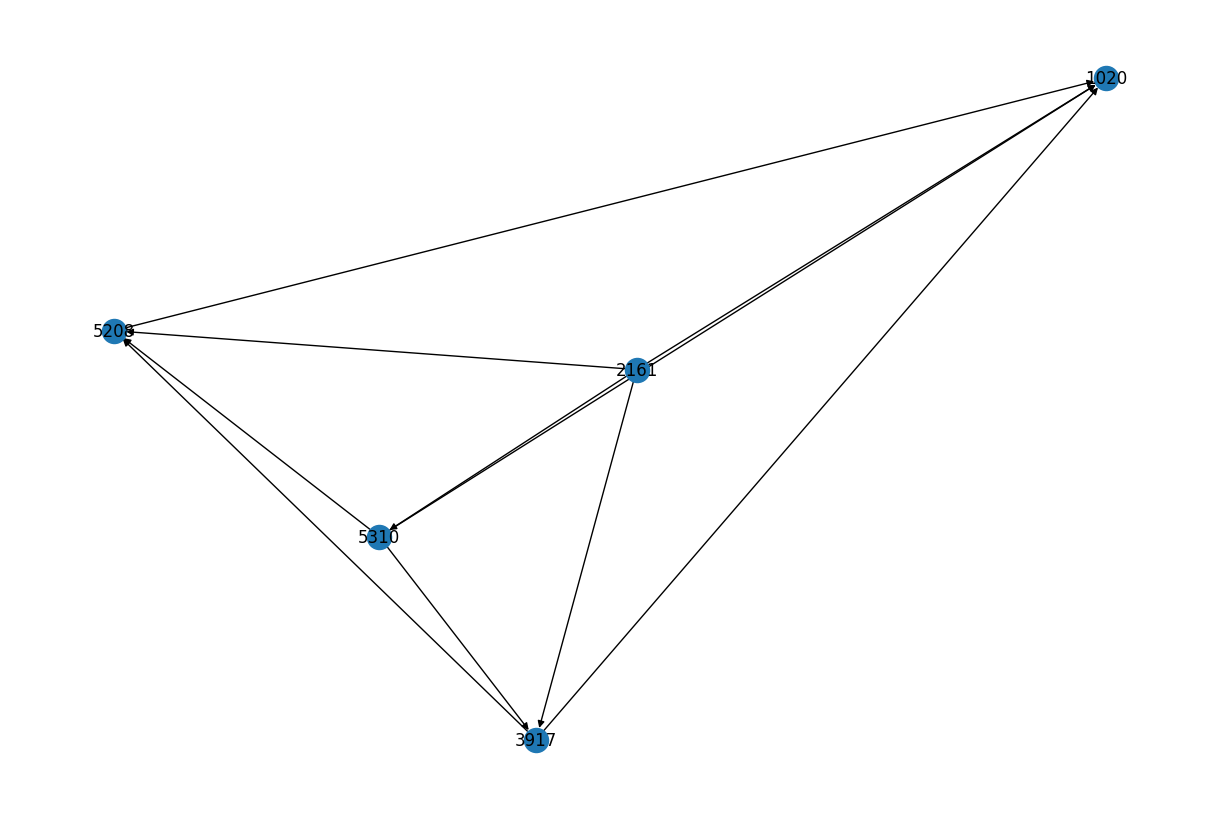

In [9]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_deg = nx.DiGraph()
graph_deg.add_edges_from(edges)
graph_deg.add_nodes_from(nodes)
pos_deg = nx.spring_layout(graph_deg)

plt.figure(figsize=(12,8))
nx.draw(graph_deg, pos_deg, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_deg, pos_deg, labels)
plt.show()

Betweenness Centrality

<Figure size 1500x1000 with 0 Axes>

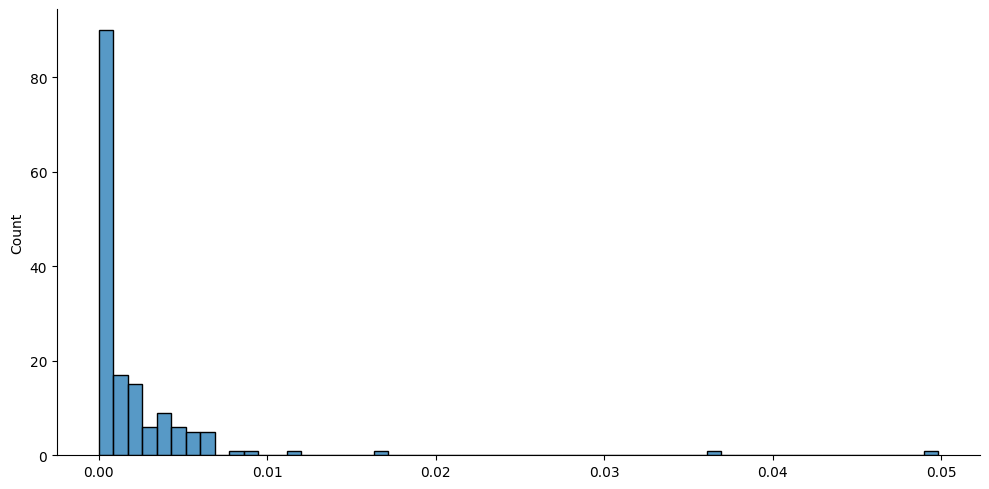

In [10]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(bet.values()), kde=False, aspect = 2)

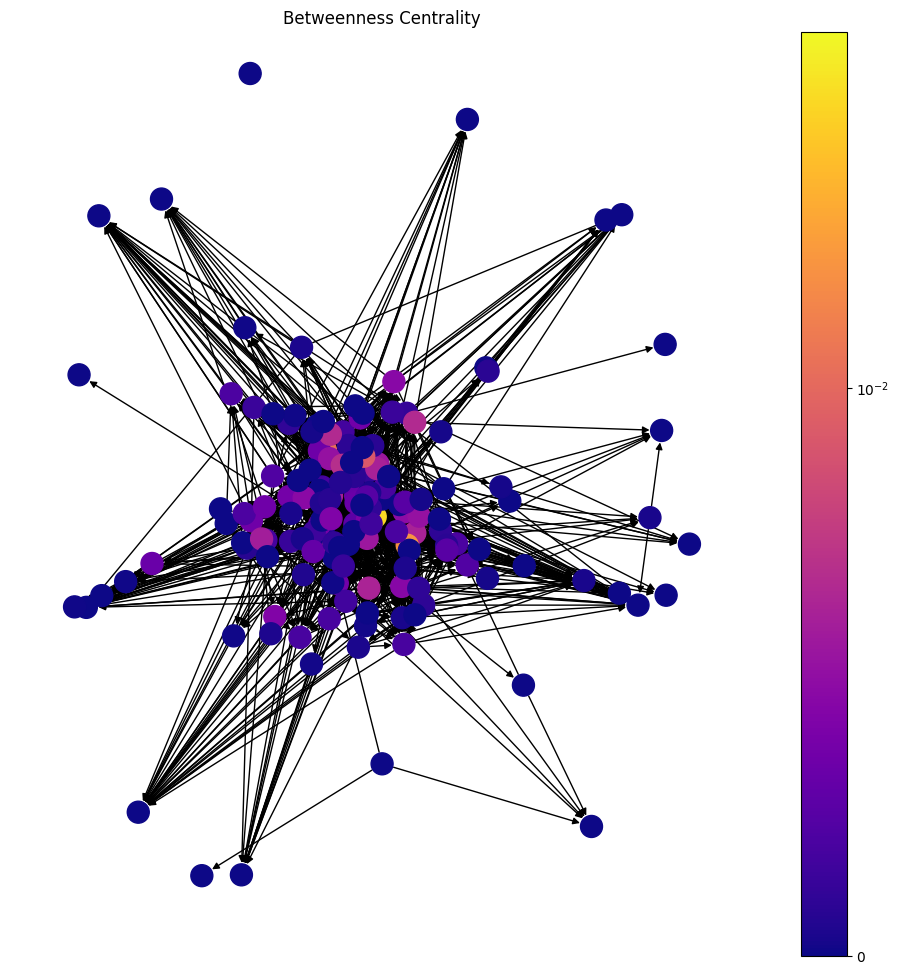

In [16]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, bet, 'Betweenness Centrality')

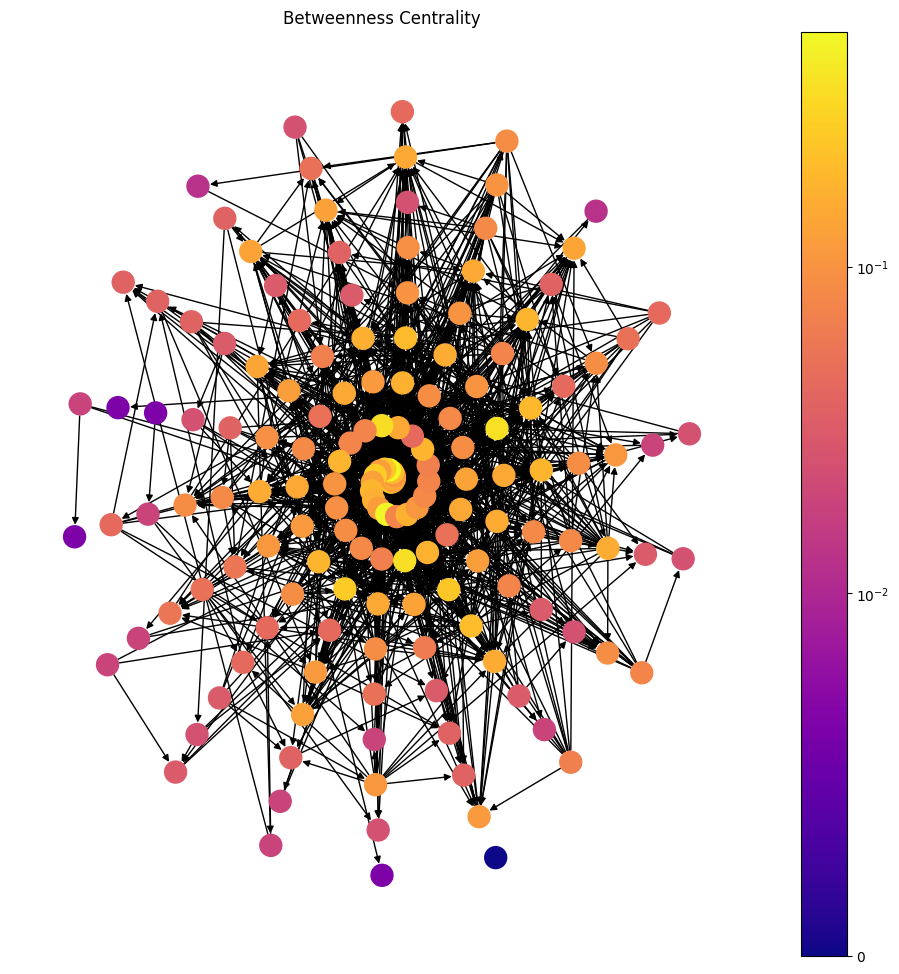

In [17]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Betweenness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{5310: Text(-0.020667641561805426, 0.11844430483732177, '5310'),
 1687: Text(0.07206902438849472, -0.0003198049790375338, '1687'),
 2161: Text(-0.09750929316210628, 0.02511778656537271, '2161'),
 3917: Text(0.05626290687647378, 0.08042282856251012, '3917')}

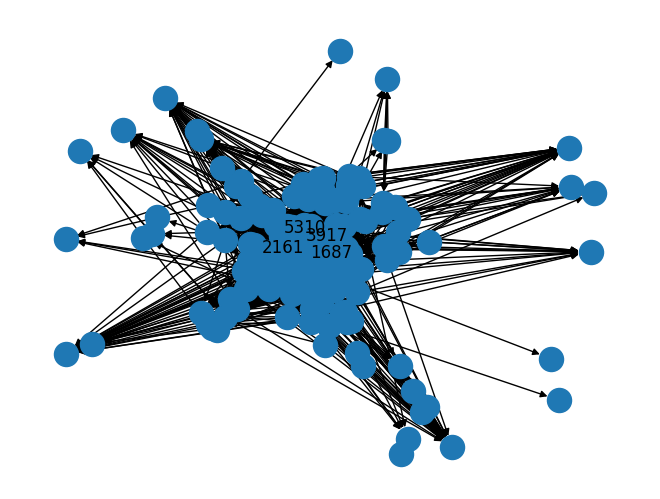

In [11]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in bet.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

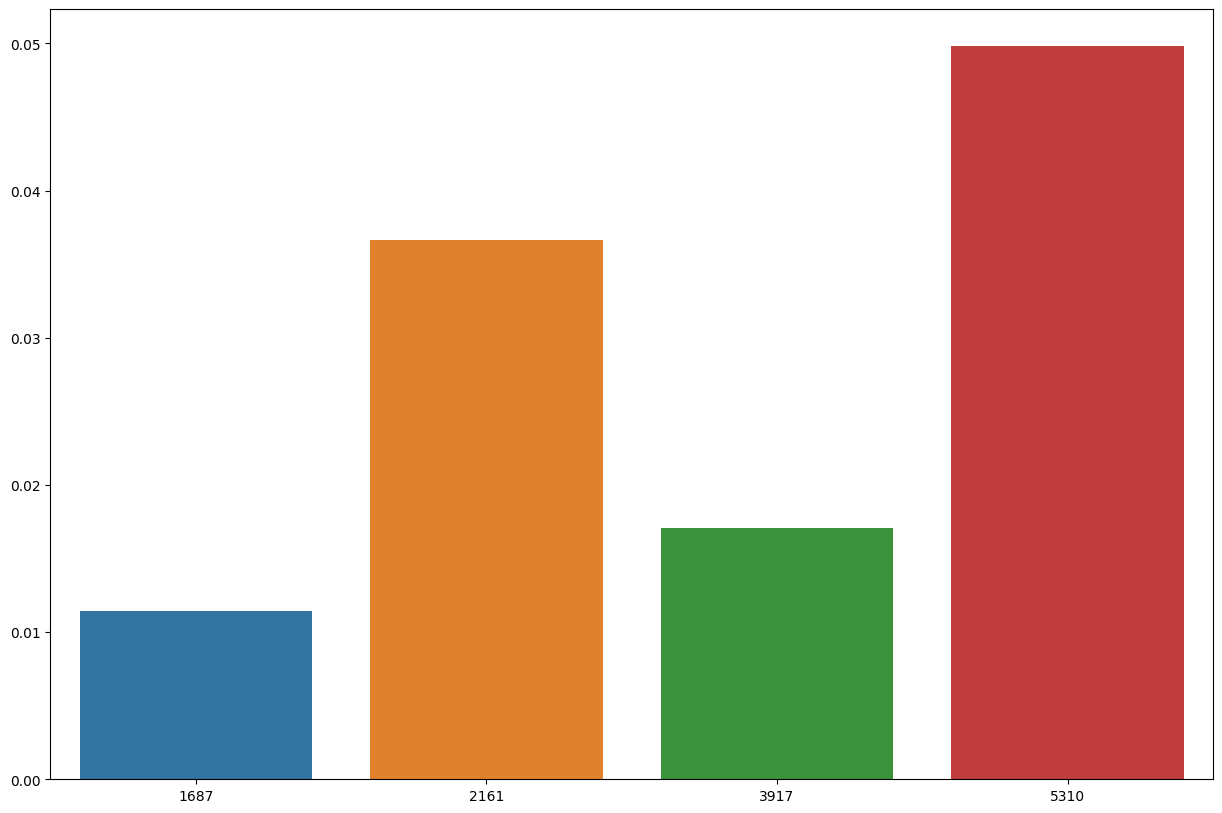

In [40]:
bet = nx.betweenness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in bet.items():
    if value > 0.01: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

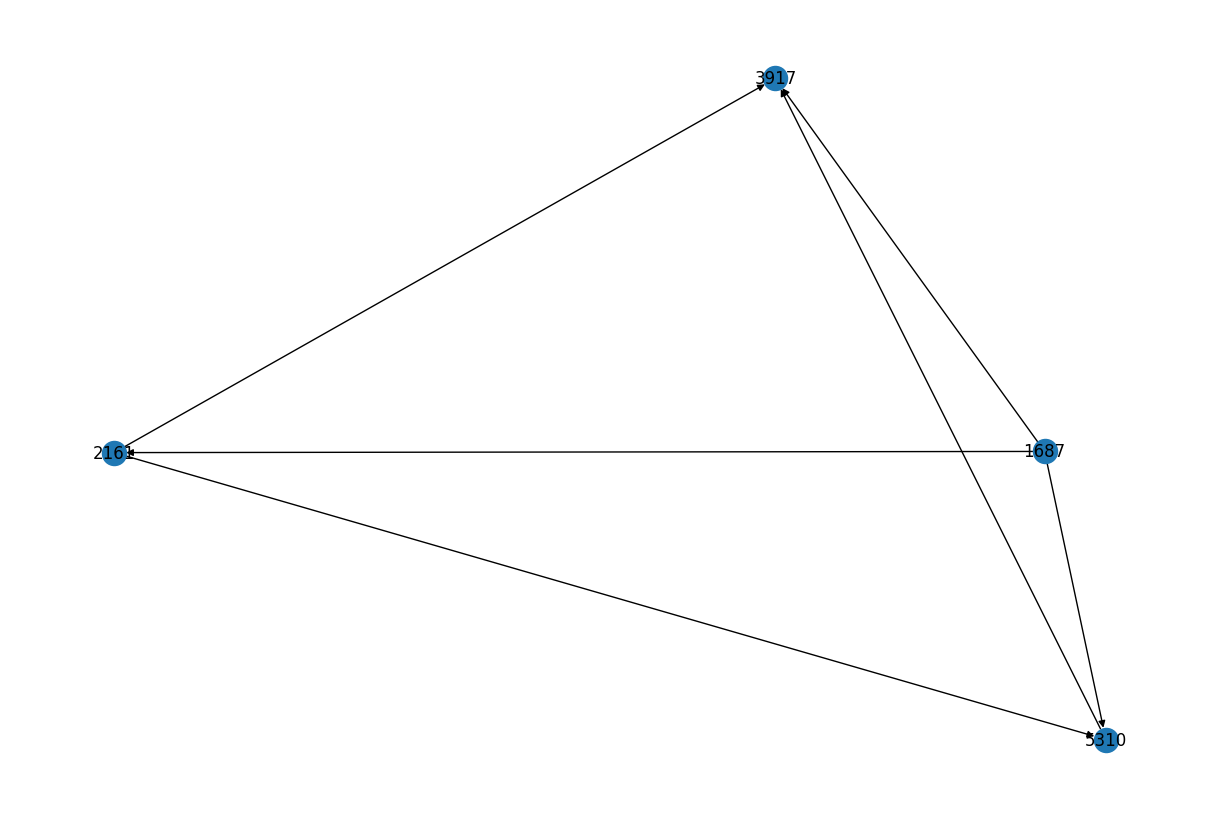

In [12]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_bet = nx.DiGraph()
graph_bet.add_edges_from(edges)
graph_bet.add_nodes_from(nodes)
pos_bet = nx.spring_layout(graph_bet)

plt.figure(figsize=(12,8))
nx.draw(graph_bet, pos_bet, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_bet, pos_bet, labels)
plt.show()

Closeness Centrality

<Figure size 1500x1000 with 0 Axes>

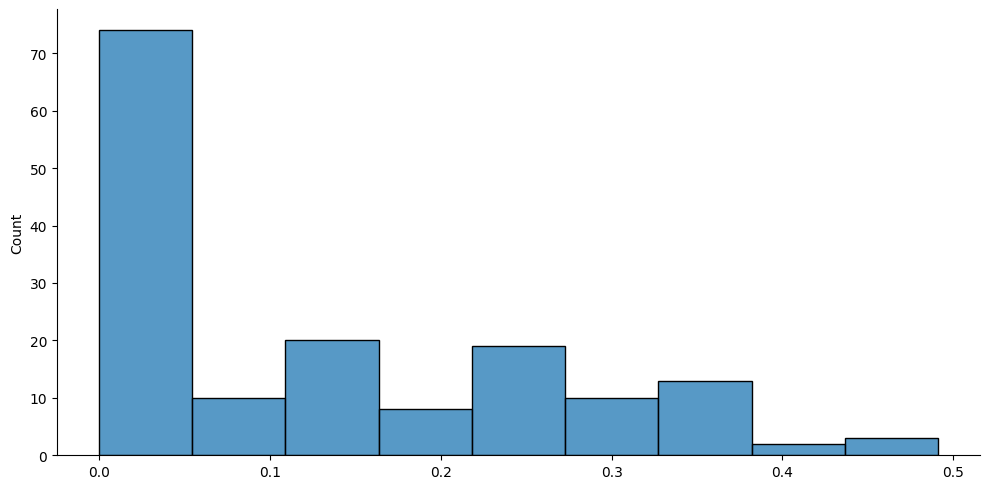

In [13]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
sns.displot(list(clos.values()), kde=False, aspect = 2)

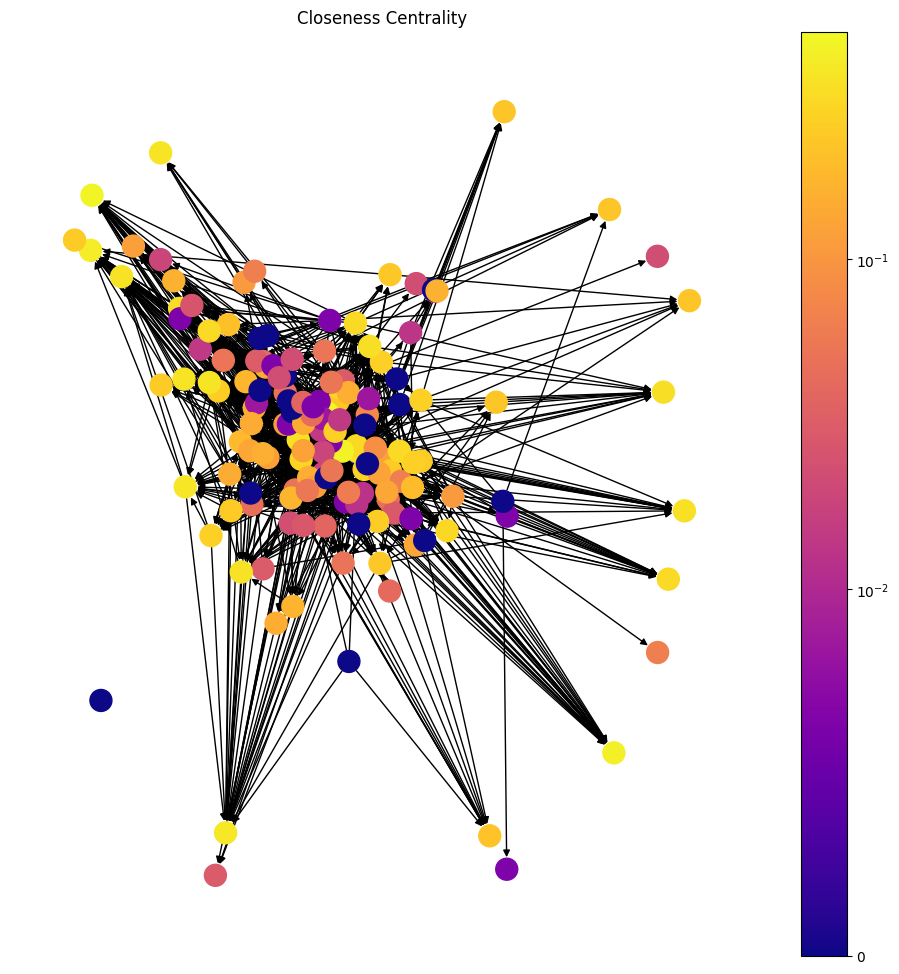

In [21]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, clos, 'Closeness Centrality')

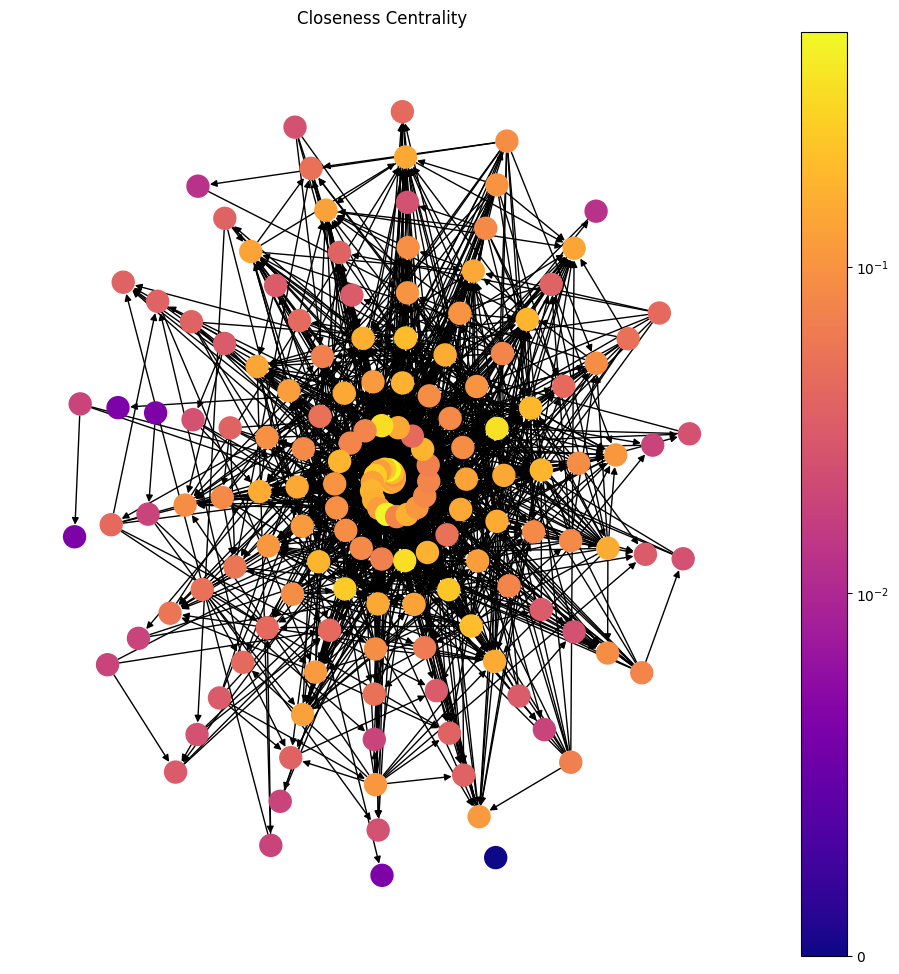

In [22]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Closeness Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{6101: Text(0.669170517829339, -0.064485353190288, '6101'),
 1020: Text(0.009537885342703443, 0.02814367652377414, '1020'),
 6488: Text(0.4155165884913312, -0.7997255335991401, '6488'),
 5208: Text(-0.014143954550016278, -0.15557888354428095, '5208'),
 6374: Text(-0.050360991203808846, 0.6592365421486676, '6374')}

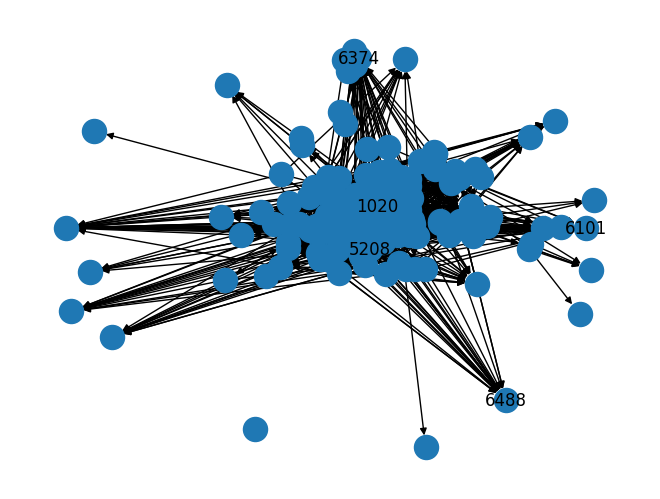

In [14]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in clos.items():
    if value > 0.4: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

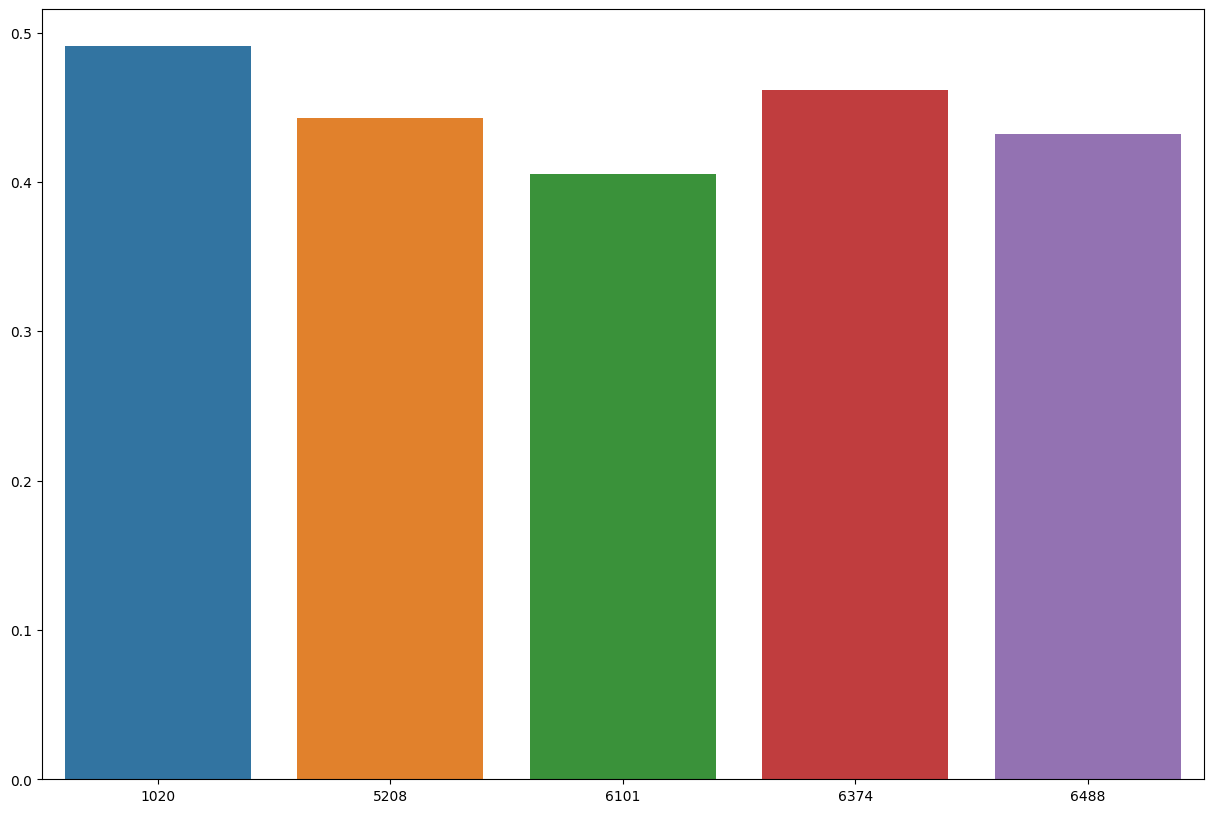

In [44]:
clos = nx.closeness_centrality(graph)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in clos.items():
    if value > 0.4: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

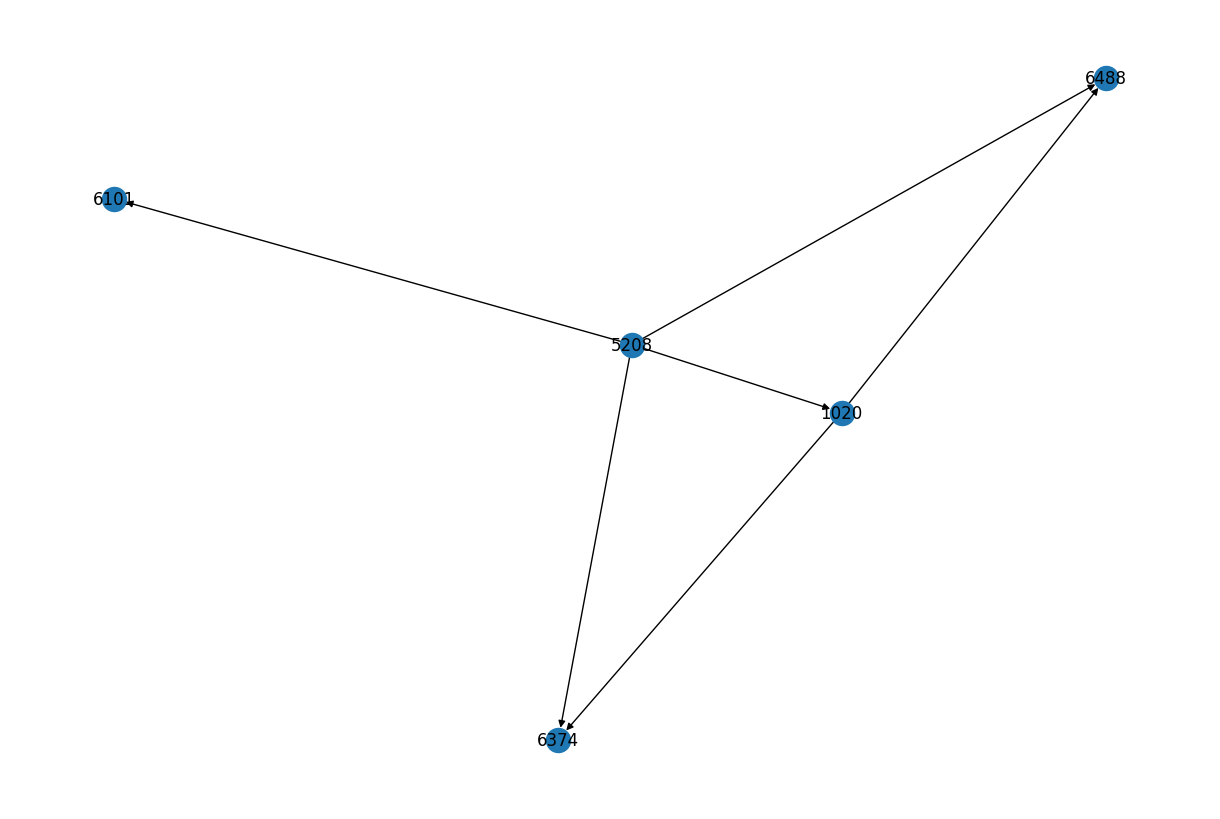

In [15]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_clos = nx.DiGraph()
graph_clos.add_edges_from(edges)
graph_clos.add_nodes_from(nodes)
pos_clos = nx.spring_layout(graph_clos)

plt.figure(figsize=(12,8))
nx.draw(graph_clos, pos_clos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_clos, pos_clos, labels)
plt.show()

Eigenvector Centrality

C:\Users\simod\AppData\Local\Temp\ipykernel_8880\1087020798.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(eigv.values()), kde=True)


<AxesSubplot:ylabel='Density'>

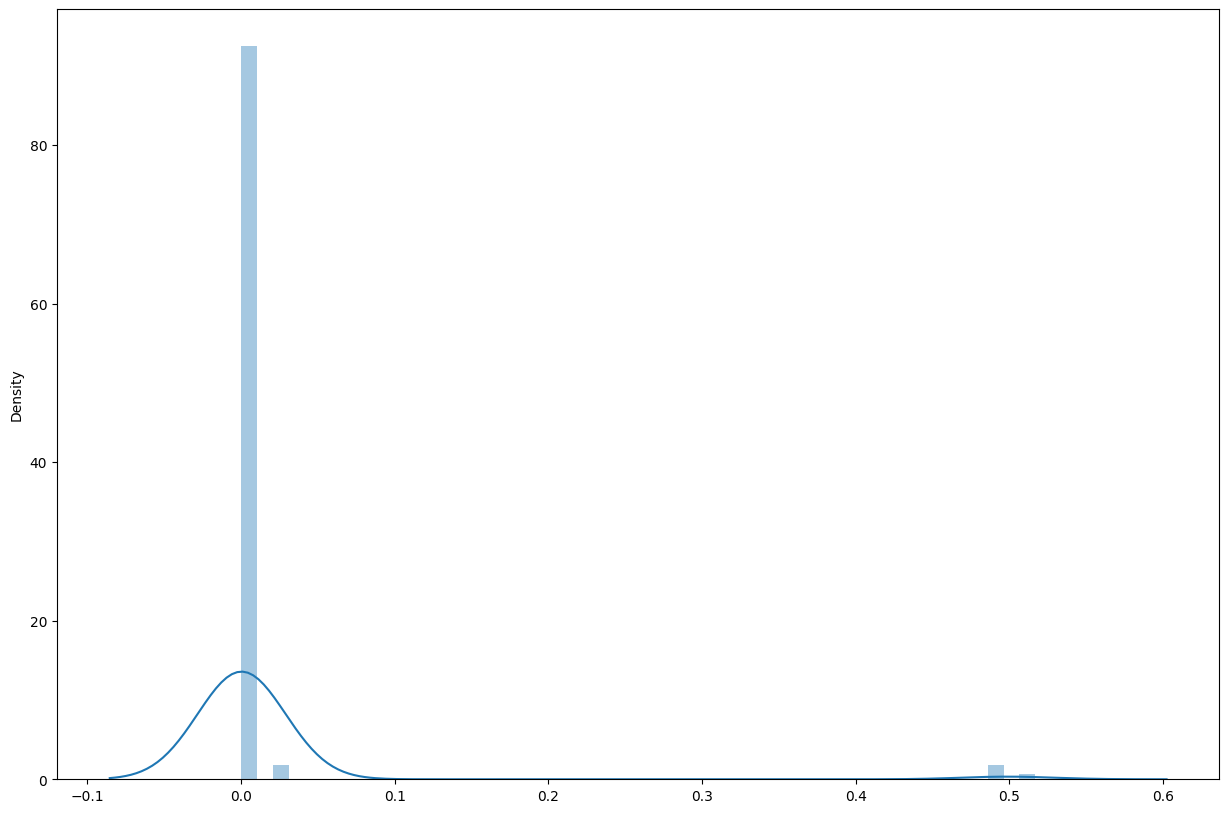

In [16]:
eigv = nx.eigenvector_centrality(graph, max_iter = 1000)
plt.figure(figsize=(15,10))
sns.distplot(list(eigv.values()), kde=True)

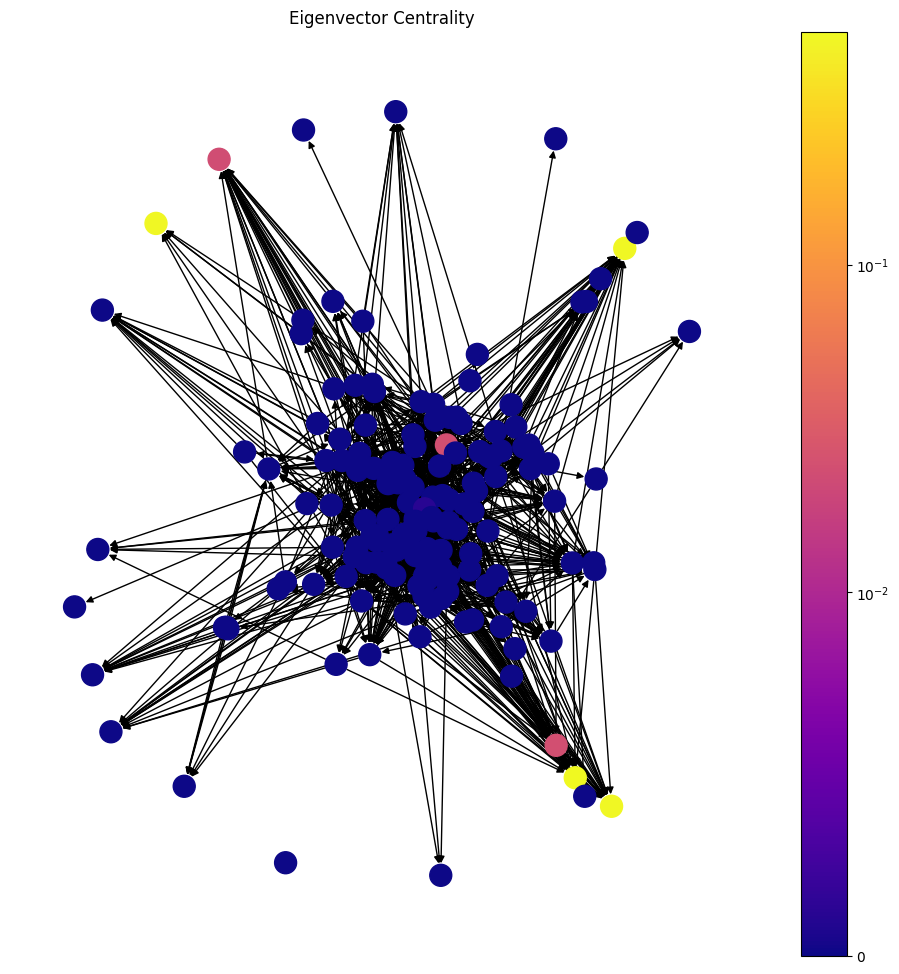

In [26]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, eigv, 'Eigenvector Centrality')

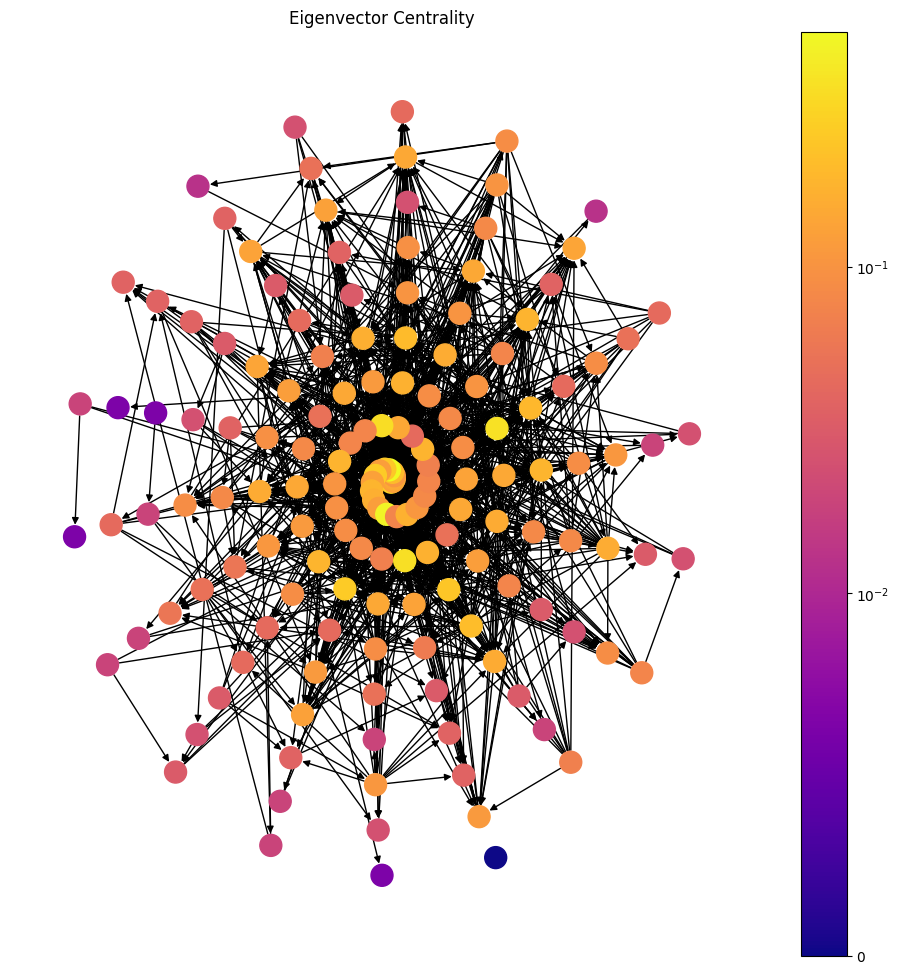

In [27]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'Eigenvector Centrality') # in questa forma non si riescono ad ottenere informazioni importanti

{6101: Text(-0.044330378461989166, 0.663849235226645, '6101'),
 6488: Text(0.0866605925182313, 0.7096127788554063, '6488'),
 6374: Text(-0.6962083526363404, -0.4802419884522867, '6374'),
 6463: Text(0.55381798083791, -0.8425762666853128, '6463')}

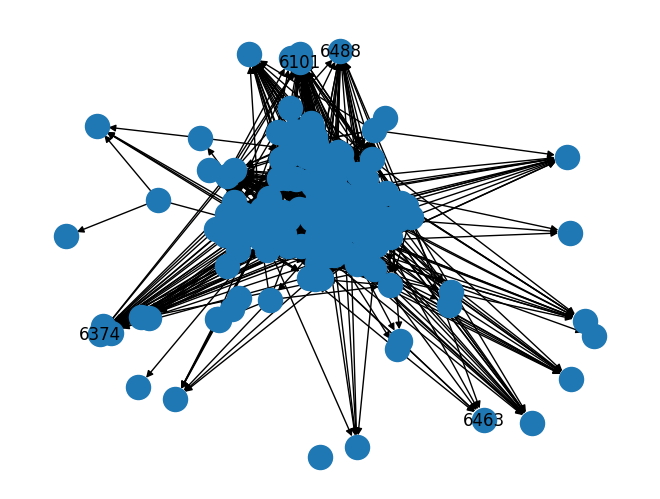

In [17]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in eigv.items():
    if value > 0.03: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

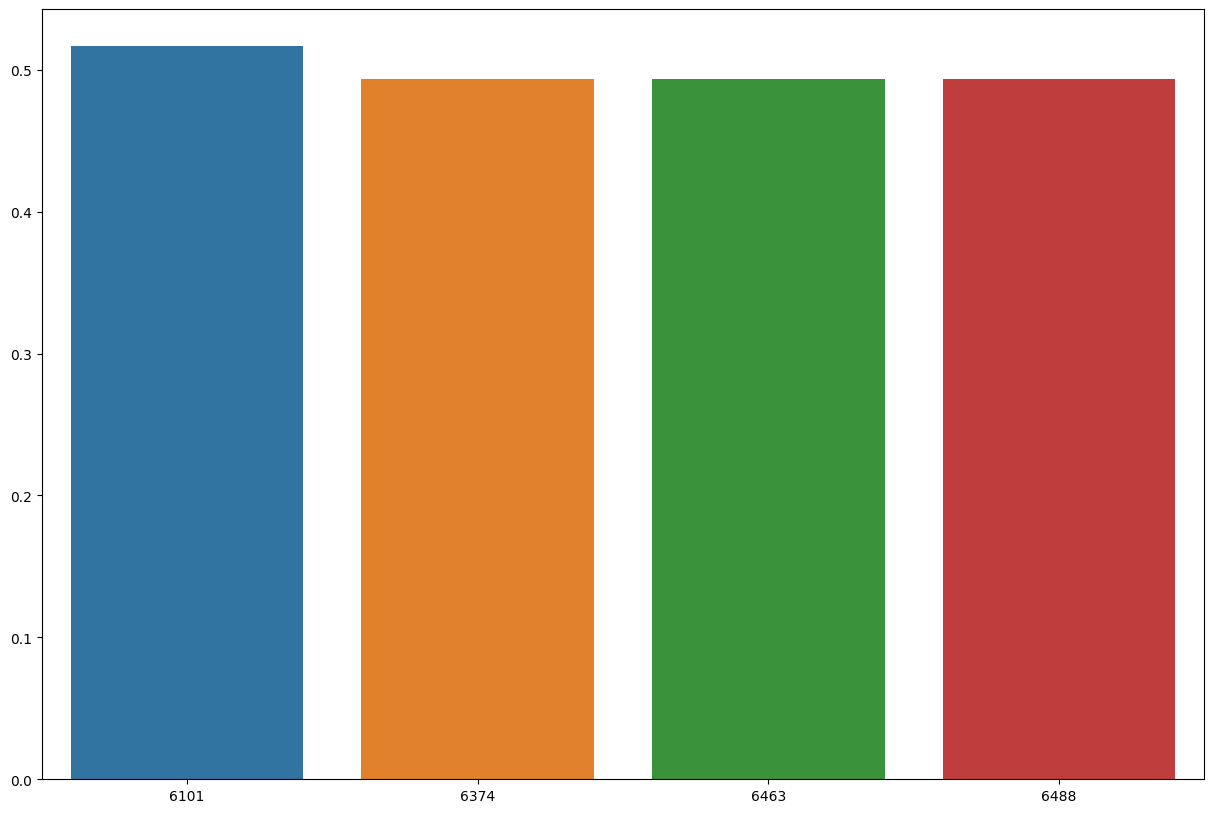

In [46]:
eigv = nx.eigenvector_centrality(graph, max_iter = 1000)
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in eigv.items():
    if value > 0.03: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

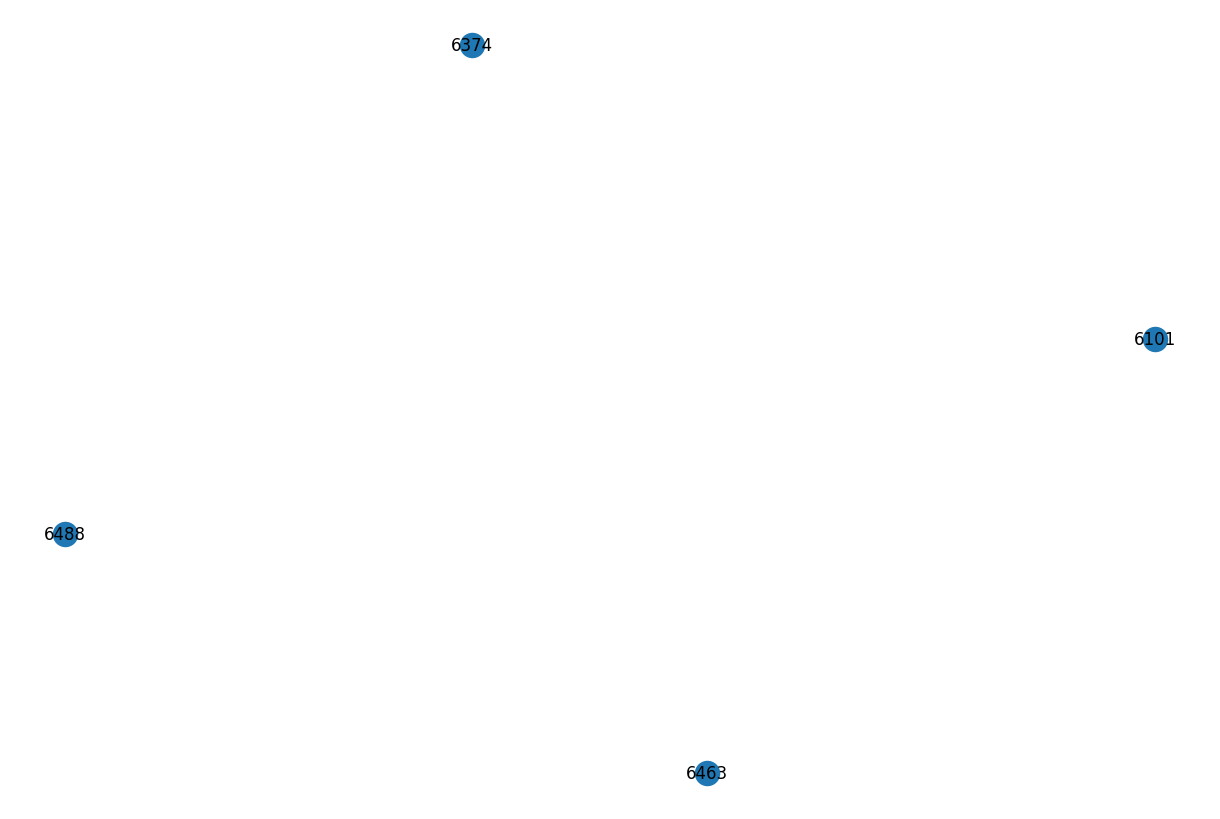

In [18]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_eigv = nx.DiGraph()
graph_eigv.add_edges_from(edges)
graph_eigv.add_nodes_from(nodes)
pos_eigv = nx.spring_layout(graph_eigv)

plt.figure(figsize=(12,8))
nx.draw(graph_eigv, pos_eigv, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_eigv, pos_eigv, labels)
plt.show()

PageRank

<Figure size 1500x1000 with 0 Axes>

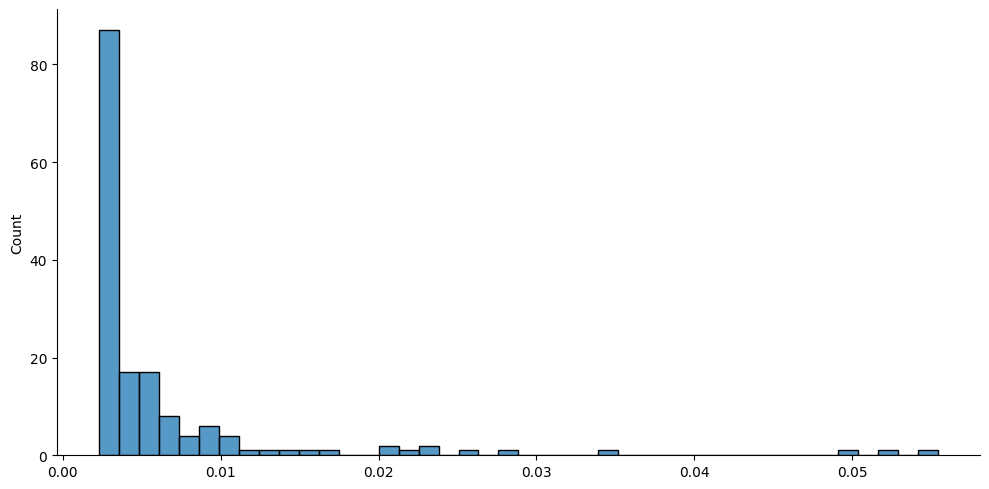

In [19]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
sns.displot(list(pager.values()), kde=False, aspect = 2)

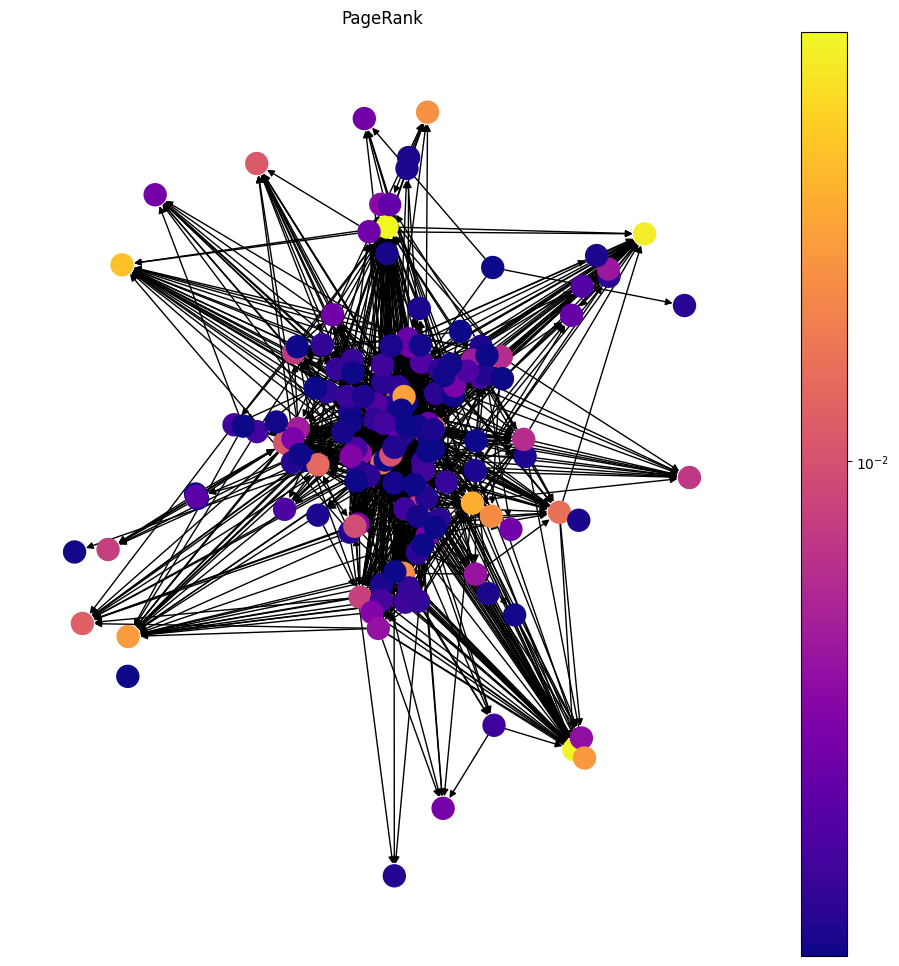

In [31]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph)
draw(graph, pos, pager, 'PageRank')

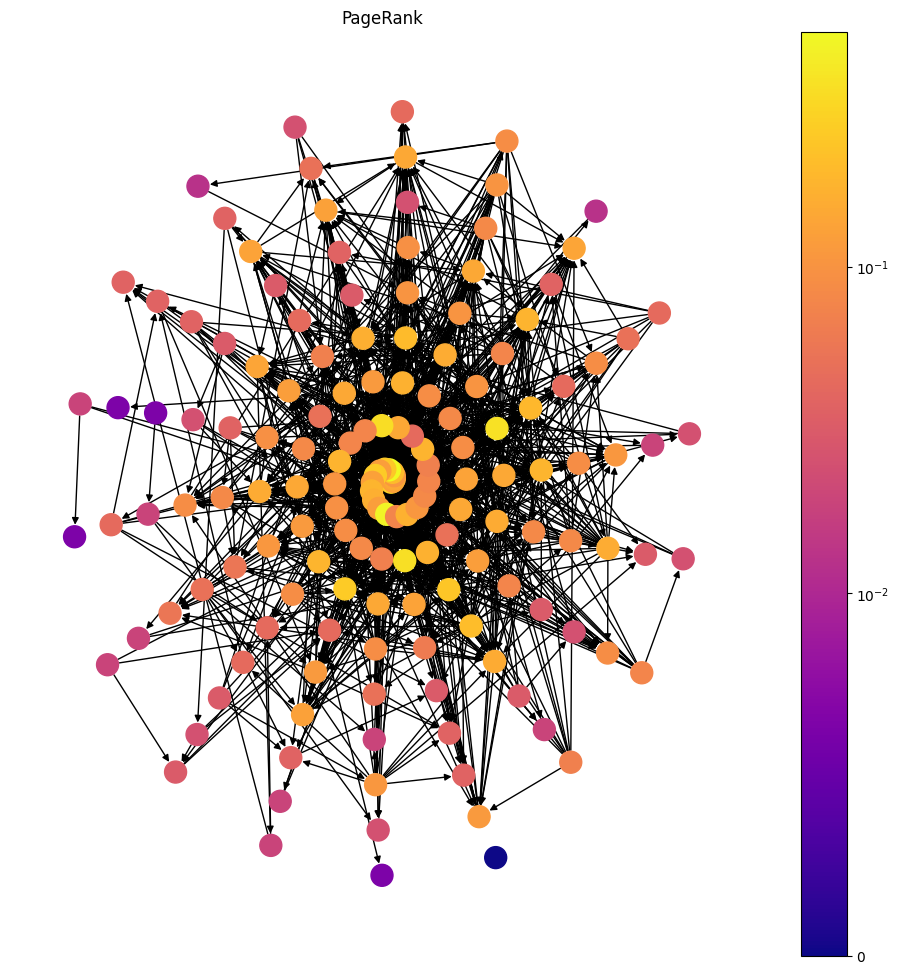

In [32]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(graph)
draw(graph, pos, degree, 'PageRank') # in questa forma non si riescono ad ottenere informazioni importanti

{6101: Text(-0.7223400372832633, -0.32930710476075864, '6101'),
 1020: Text(-0.04747064193406239, -0.2169061676675669, '1020'),
 6488: Text(0.7342161950431756, -0.5455471246254046, '6488'),
 6374: Text(-0.6166849446087806, 0.47595002790805085, '6374')}

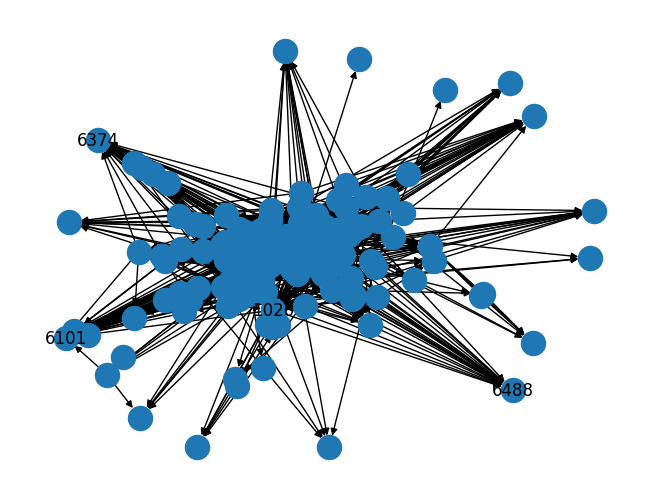

In [20]:
#cambiare visualizzazione
labels = {} # quale nodo deve avere quale label
for key, value in pager.items():
    if value > 0.03: #faccio vedere solo le labels di nodi più importanti
        labels[key]=key

pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph, pos, labels)

<AxesSubplot:>

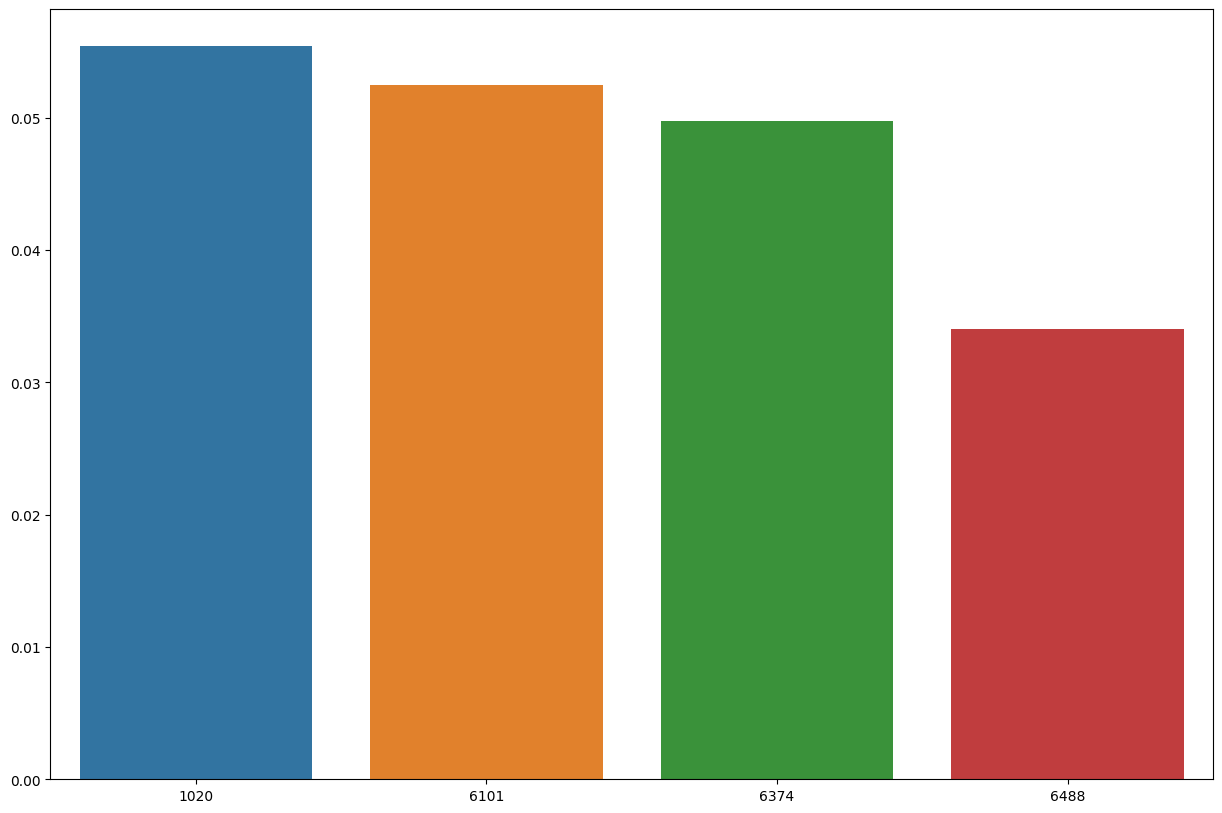

In [34]:
pager = nx.pagerank(graph, alpha=0.85) #l'alpha è chiamato damping factor
plt.figure(figsize=(15,10))
x = []
y = []
for key, value in pager.items():
    if value > 0.03: #faccio vedere solo le labels di nodi più importanti
        x.append(key)
        y.append(value)
sns.barplot(x = x, y = y)

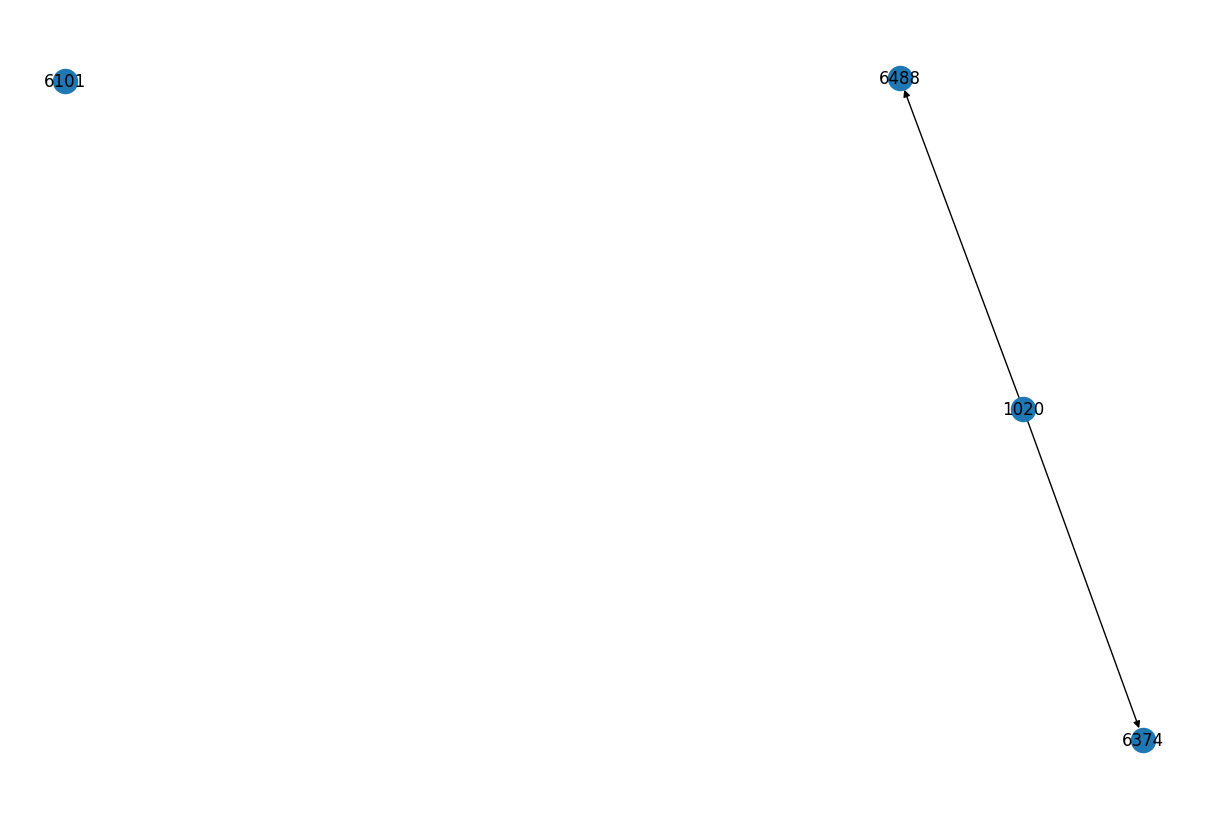

In [21]:
nodes = labels
edges = []

for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
    if(f in nodes and t in nodes):
        edges.append((f,t))

graph_pager = nx.DiGraph()
graph_pager.add_edges_from(edges)
graph_pager.add_nodes_from(nodes)
pos_pager = nx.spring_layout(graph_pager)

plt.figure(figsize=(12,8))
nx.draw(graph_pager, pos_pager, with_labels = False) # non metto inizialmente le Labels perchè voglio mettere le mie
nx.draw_networkx_labels(graph_pager, pos_pager, labels)
plt.show()

### Analisi delle strutture

Communites

In [22]:
# BONUS
from networkx.algorithms import community

communities = community.greedy_modularity_communities(graph)
communities

[frozenset({38,
            285,
            410,
            500,
            535,
            586,
            774,
            904,
            1015,
            1018,
            1055,
            1100,
            1133,
            1233,
            1465,
            1474,
            1670,
            1890,
            1972,
            2147,
            2184,
            2253,
            2468,
            2478,
            2614,
            2877,
            2917,
            3010,
            3051,
            3084,
            3130,
            3138,
            3168,
            3182,
            3498,
            3623,
            3754,
            3759,
            3905,
            4069,
            4129,
            4211,
            4276,
            4440,
            4520,
            4565,
            4627,
            4662,
            4716,
            4918,
            4944,
            4960,
            5108,
            5208,
            5587,
            5921,
 

In [23]:
len(communities)

5

In [24]:
def caricamento(nodes):
    edges = []
    for f,t in zip(df_edge["from"].to_list(), df_edge["to"].to_list()):
        if(f in nodes and t in nodes):
            edges.append((f,t))
    return edges

def grafo(nodes, edges):
    graph = nx.DiGraph()
    graph.add_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.spring_layout(graph)
    return graph

def visualizza(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos)

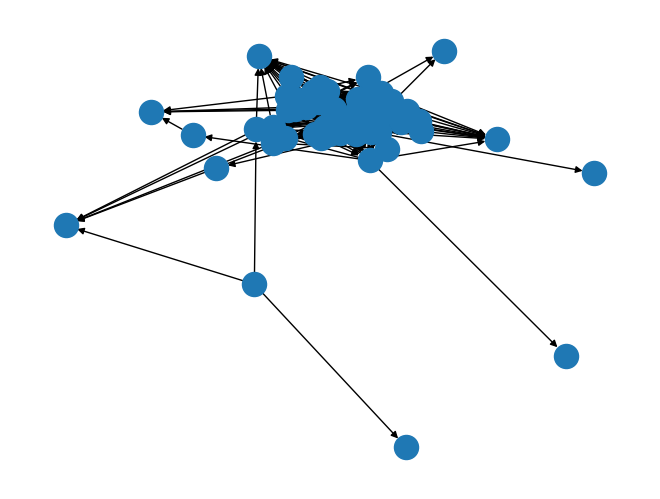

In [25]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[0])
graph_comm1 = grafo(communities[0], edges)
visualizza(graph_comm1)

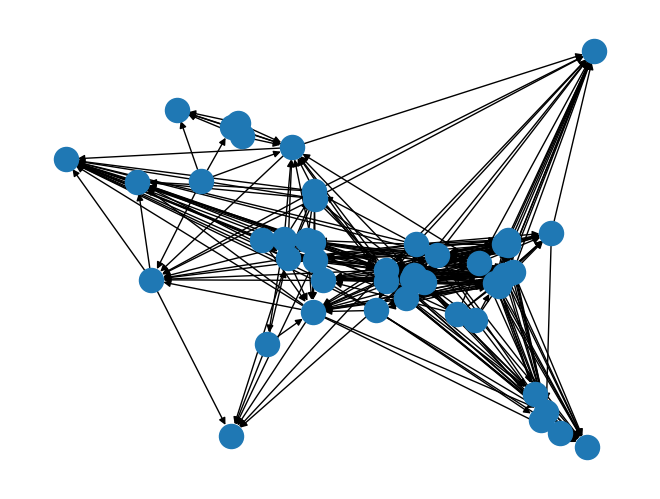

In [26]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[1])
graph_comm2 = grafo(communities[1], edges)
visualizza(graph_comm2)

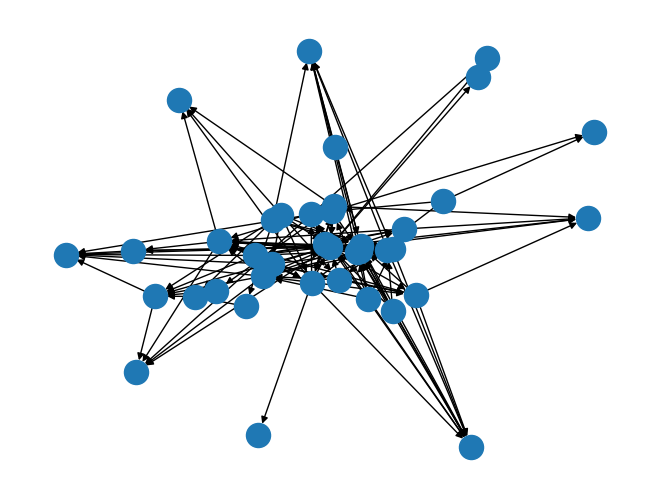

In [27]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[2])
graph_comm3 = grafo(communities[2], edges)
visualizza(graph_comm3)

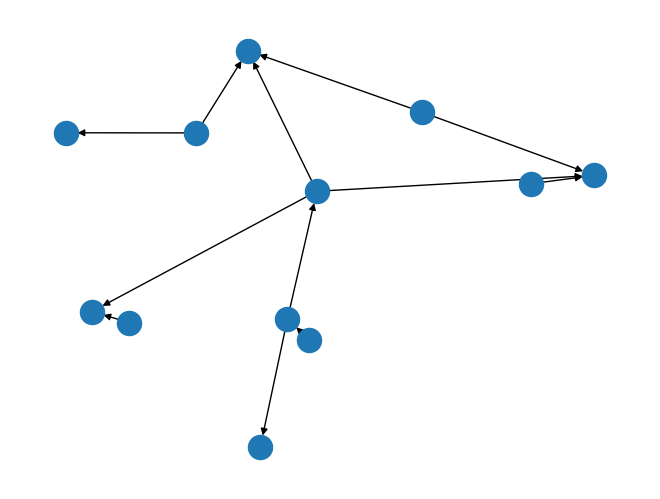

In [28]:
#Costruzione e visualizzazione del grafo orientato
edges = caricamento(communities[3])
graph_comm4 = grafo(communities[3], edges)
visualizza(graph_comm4)